In [ ]:
# パッケージのインポート
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# データセットの準備
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# データセットのシェイプの確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


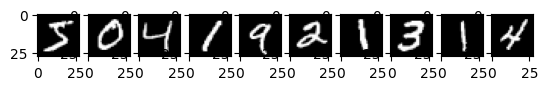

In [ ]:
# データセットの画像の確認
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

In [ ]:
# データセットのラベルの確認
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# データセットの画像の前処理
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

In [ ]:
# データセットの画像の前処理後のシェイプの確認
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
# データセットのラベルの前処理
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# データセットのラベルの前処理後のシェイプの確認
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
# モデルの作成
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 入力層 #Dene:全結合
model.add(Dense(128, activation='sigmoid')) # 隠れ層
model.add(Dropout(rate=0.5)) # ドロップアウト
model.add(Dense(10, activation='softmax')) # 出力層

In [ ]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['acc'])

In [ ]:
# 学習
history = model.fit(train_images, train_labels, batch_size=500,
    epochs=5, validation_split=0.2)

Epoch 1/5
96/96 [==============================] - 4s 28ms/step - loss: 1.7121 - acc: 0.4436 - val_loss: 0.9778 - val_acc: 0.8439
Epoch 2/5
96/96 [==============================] - 1s 16ms/step - loss: 0.9236 - acc: 0.7444 - val_loss: 0.5724 - val_acc: 0.8854
Epoch 3/5
96/96 [==============================] - 2s 16ms/step - loss: 0.6580 - acc: 0.8200 - val_loss: 0.4258 - val_acc: 0.9038
Epoch 4/5
96/96 [==============================] - 2s 17ms/step - loss: 0.5406 - acc: 0.8511 - val_loss: 0.3606 - val_acc: 0.9095
Epoch 5/5
96/96 [==============================] - 2s 20ms/step - loss: 0.4727 - acc: 0.8715 - val_loss: 0.3200 - val_acc: 0.9161


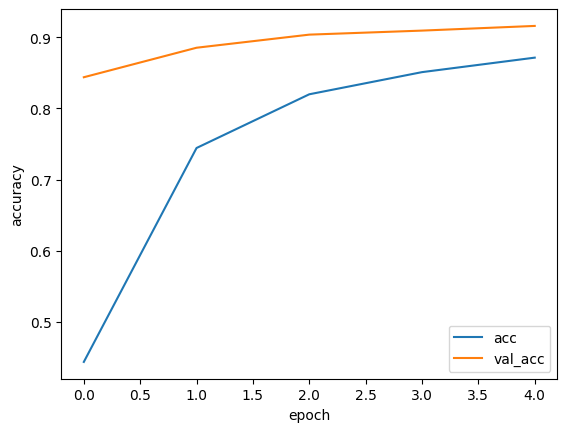

In [ ]:
# グラフの表示
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
# 評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 [==============================] - 1s 4ms/step - loss: 0.3243 - acc: 0.9161
loss: 0.324
acc: 0.916


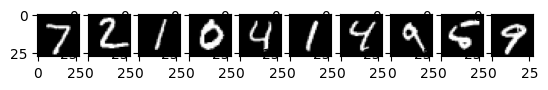

In [ ]:
# 推論する画像の表示
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

In [ ]:
# 推論したラベルの表示
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)

1/1 [==============================] - 0s 86ms/step
[7 2 1 0 4 1 4 9 6 9]
